In [21]:
titanic = pd.read_csv('train_and_test2.csv')
titanic.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [31]:
titanic['Pclass'].head() #1st~3rd class

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [28]:
titanic['Embarked'].tail() # 0, 1, 2 // C = Cherbourg, Q = Queenstown, S = Southampton

1304    2.0
1305    0.0
1306    2.0
1307    2.0
1308    0.0
Name: Embarked, dtype: float64

In [34]:
titanic['sibsp'].tail() # of siblings / spouses aboard the Titanic

1304    0
1305    0
1306    0
1307    0
1308    1
Name: sibsp, dtype: int64

In [37]:
titanic['Parch'].tail() # of parents / children aboard the Titanic

1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, dtype: int64

So the feautres to consider refer to 'age', 'fare', 'sex', 'embarked', 'Pclass', ''sibsp', and 'Parch'  # 7 features
What I'm gonna do is to use these 7 features to maximaize the predictability of the model and practice.

First, I'll use matplotlib to visulize the relationship between the features and 'survived'


*Filled the missing values in 'Age' and 'Fare' attributes with the median of the data.

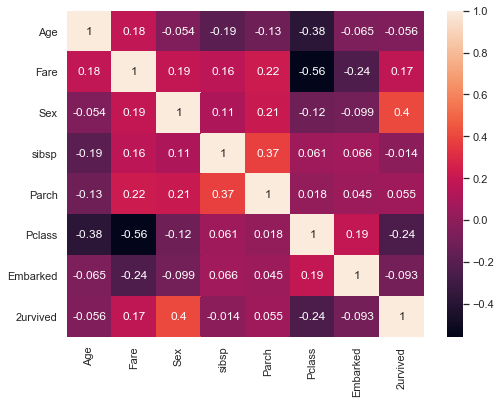

In [40]:
corr_list = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']
corr = titanic[corr_list].corr() 

mpl.pyplot.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, cbar=True)

Seems that most of the feautres except for 'sex' dont have strong relations with 'survived'.


Then let me check if there's use the linear regression model to check if each of thoes features have any linear relation with 'survived'. 

In [42]:
def linear(feature):
    dfX0 = titanic[feature]
    dfX = sm.add_constant(dfX0)
    dfy = titanic['2urvived']

    model = sm.OLS(dfy, dfX)
    result = model.fit()
    
    print(f"{feature}의 가중치값" , result.params)
    print(f"{feature}의 선형회귀 결과 요약", result.summary())
    
    print(f"{feature}의 잔차분포")
    sp.stats.probplot(result.resid, plot=plt)
    plt.show()
    

Age의 가중치값 const    0.317395
Age     -0.001902
dtype: float64
Age의 선형회귀 결과 요약                             OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.091
Date:                Tue, 15 Sep 2020   Prob (F-statistic):             0.0433
Time:                        11:35:54   Log-Likelihood:                -778.67
No. Observations:                1309   AIC:                             1561.
Df Residuals:                    1307   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

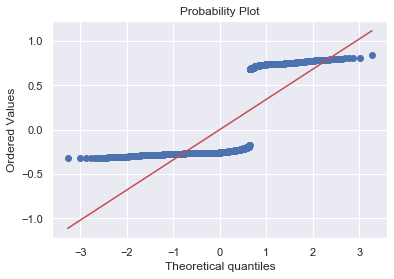

Fare의 가중치값 const    0.212140
Fare     0.001476
dtype: float64
Fare의 선형회귀 결과 요약                             OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     40.70
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.45e-10
Time:                        11:35:55   Log-Likelihood:                -760.65
No. Observations:                1309   AIC:                             1525.
Df Residuals:                    1307   BIC:                             1536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

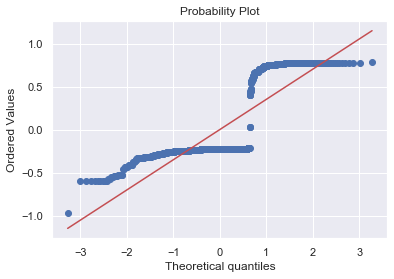

Sex의 가중치값 const    0.1293
Sex      0.3707
dtype: float64
Sex의 선형회귀 결과 요약                             OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     255.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.44e-52
Time:                        11:35:55   Log-Likelihood:                -664.08
No. Observations:                1309   AIC:                             1332.
Df Residuals:                    1307   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

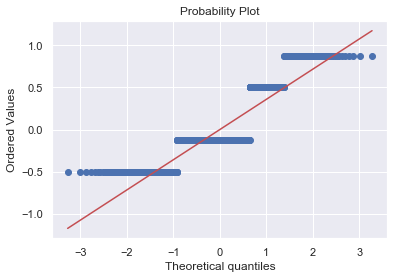

sibsp의 가중치값 const    0.264294
sibsp   -0.006065
dtype: float64
sibsp의 선형회귀 결과 요약                             OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2702
Date:                Tue, 15 Sep 2020   Prob (F-statistic):              0.603
Time:                        11:35:56   Log-Likelihood:                -780.58
No. Observations:                1309   AIC:                             1565.
Df Residuals:                    1307   BIC:                             1576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

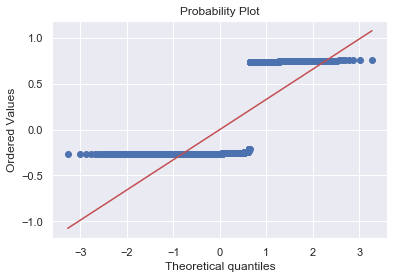

Parch의 가중치값 const    0.250534
Parch    0.027880
dtype: float64
Parch의 선형회귀 결과 요약                             OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.952
Date:                Tue, 15 Sep 2020   Prob (F-statistic):             0.0470
Time:                        11:35:56   Log-Likelihood:                -778.74
No. Observations:                1309   AIC:                             1561.
Df Residuals:                    1307   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

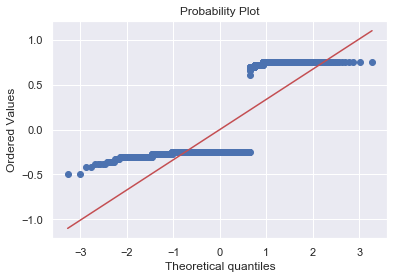

Pclass의 가중치값 const     0.555820
Pclass   -0.128352
dtype: float64
Pclass의 선형회귀 결과 요약                             OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     83.23
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.68e-19
Time:                        11:35:57   Log-Likelihood:                -740.31
No. Observations:                1309   AIC:                             1485.
Df Residuals:                    1307   BIC:                             1495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

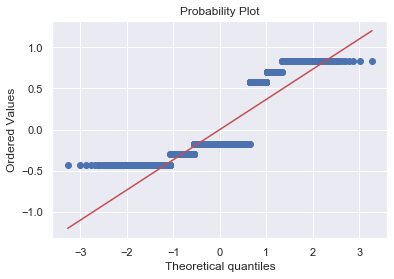

MissingDataError: exog contains inf or nans

In [43]:
feature_list = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']
for feature in feature_list:
    linear(feature)


If it were not for a linear regression, what would it be like for logistic regression?
It might work beter with the model.

In [ ]:
print(result.summary())